In this notebook I load the split data set saved in the previous notebook, and compute a PCA transformation TOA reflectance of the training set. I apply this transformation to both training and test sets

In [1]:
import pickle
import warnings

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

from seaborn import heatmap
import matplotlib.pyplot as pl

from notebook_utils import *

warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
pl.style.use('bmh')

In [3]:
with open('../PickleJar/DataSets/SplitSets.pkl', 'rb') as fb:
    datadict = pickle.load(fb)

In [4]:
x_test = datadict['x_test']
x_train = datadict['x_train']

In [5]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 14 entries, 129 to 187
Data columns (total 9 columns):
oisst            14 non-null float64
etopo2           14 non-null float64
solz             14 non-null float64
sat_rho_rc412    14 non-null float64
sat_rho_rc443    14 non-null float64
sat_rho_rc490    14 non-null float64
sat_rho_rc510    14 non-null float64
sat_rho_rc555    14 non-null float64
sat_rho_rc670    14 non-null float64
dtypes: float64(9)
memory usage: 1.1 KB


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 2 to 494
Data columns (total 9 columns):
oisst            150 non-null float64
etopo2           150 non-null float64
solz             150 non-null float64
sat_rho_rc412    150 non-null float64
sat_rho_rc443    150 non-null float64
sat_rho_rc490    150 non-null float64
sat_rho_rc510    150 non-null float64
sat_rho_rc555    150 non-null float64
sat_rho_rc670    150 non-null float64
dtypes: float64(9)
memory usage: 11.7 KB


In [7]:
pca_scaler = PCA()

In [8]:
pca_train = pd.DataFrame(pca_scaler.fit_transform(x_train.filter(regex='sat_rho_rc')),
                         columns=[f'pc{i}' for i in range(1, 7)], index=x_train.index)

In [9]:
pca_train.head()

,pc1,pc2,pc3,pc4,pc5,pc6
Row_ID,,,,,,
2,-0.008285,-0.000990,0.000086,0.000170,-0.000220,0.000043
3,-0.005603,-0.001560,0.000351,0.000102,-0.000144,-0.000023
26,-0.000137,-0.006880,0.001303,0.001624,0.000121,-0.000153
31,0.000158,0.003202,-0.002319,0.000189,0.000257,-0.000177
32,0.003382,0.003694,-0.001514,0.000991,0.000237,-0.000043


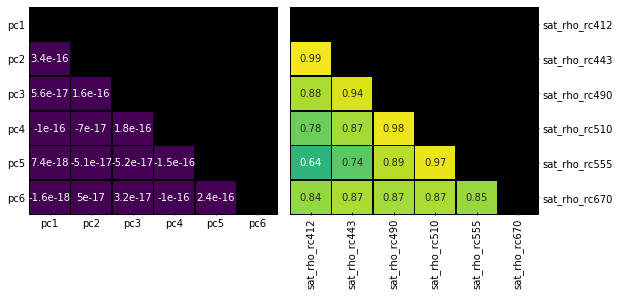

In [10]:
f, axs = pl.subplots(ncols=2, figsize=(8.5, 4), constrained_layout=True)
axs[0].set_facecolor('k')
axs[1].set_facecolor('k')
heatmap(pca_train.corr(), cmap='viridis', vmin=0, annot=True, cbar=False,
       ax=axs[0], mask=np.triu(np.ones([pca_train.shape[1]]*2),), linewidth=.5, linecolor='k');
heatmap(x_train.filter(regex='sat').corr(), vmin=0, cmap='viridis', annot=True, cbar=False,
       ax=axs[1], mask=np.triu(np.ones([x_train.filter(regex='sat').shape[1]]*2),),
       linewidth=.5, linecolor='k');
axs[1].yaxis.tick_right()
axs[0].set_yticklabels(axs[0].get_yticklabels(), rotation=0)
axs[1].set_yticklabels(axs[1].get_yticklabels(), rotation=0);

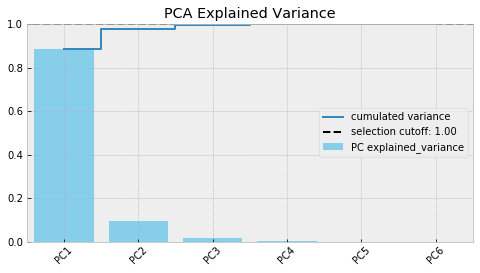

In [11]:
_, ax = pl.subplots(figsize=(8, 4))
PlotPCARes(pca_scaler, threshold=1, alpha=0.9, num_pca_disp=pca_train.shape[1], ax=ax)

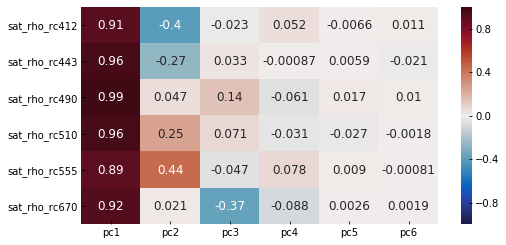

In [14]:
_, ax = pl.subplots(figsize=(8, 4))
PlotCrossCorr(pca_train, x_train.filter(regex='sat'), ax=ax, annot_kws={'fontsize': 12}, fmt='.2g')

Merge and save

In [15]:
pca_train.head()

,pc1,pc2,pc3,pc4,pc5,pc6
Row_ID,,,,,,
2,-0.008285,-0.000990,0.000086,0.000170,-0.000220,0.000043
3,-0.005603,-0.001560,0.000351,0.000102,-0.000144,-0.000023
26,-0.000137,-0.006880,0.001303,0.001624,0.000121,-0.000153
31,0.000158,0.003202,-0.002319,0.000189,0.000257,-0.000177
32,0.003382,0.003694,-0.001514,0.000991,0.000237,-0.000043


In [16]:
x_train.head()

,oisst,etopo2,solz,sat_rho_rc412,sat_rho_rc443,sat_rho_rc490,sat_rho_rc510,sat_rho_rc555,sat_rho_rc670
Row_ID,,,,,,,,,
2,0.78,330.0,52.7,0.004443,0.004387,0.004240,0.003686,0.002646,0.001177
3,1.79,2193.0,45.9,0.005869,0.005866,0.005535,0.004643,0.003326,0.001747
26,27.99,4403.0,13.3,0.011926,0.010478,0.007397,0.004815,0.003104,0.001721
31,6.68,14.0,27.4,0.005633,0.006515,0.007241,0.007763,0.009189,0.005709
32,10.66,9.0,22.2,0.007095,0.007713,0.008722,0.009292,0.011147,0.005609


In [17]:
x_train_pca = x_train[['oisst', 'etopo2', 'solz']].merge(pca_train, left_index=True, right_index=True)

In [18]:
np.testing.assert_array_equal(x_train_pca.index.values, x_train.index.values)

In [19]:
pca_test = pd.DataFrame(pca_scaler.transform(x_test.filter(regex='sat_rho_rc')),
                         columns=[f'pc{i}' for i in range(1, 7)], index=x_test.index)

In [20]:
x_test_pca = x_test[['oisst', 'etopo2', 'solz']].merge(pca_test, left_index=True, right_index=True)

In [25]:
datadict['x_test_pca'] = x_test_pca
datadict['x_train_pca'] = x_train_pca
datadict['pca_transformer'] = pca_scaler

In [26]:
with open('../PickleJar/DataSets/SplitSets.pkl', 'wb') as fb:
    pickle.dump(datadict, fb)